In [ ]:
# 언어 모델은 통계적으로 계산 가능한 형태
#  언어모델 - Ngram(통계적 언어모델)
# S = {A,B,C,D}
# P(A,B,C,D) => NLU => P(S1)
#   ------- Transformer Encoder
# P(?|B,C,D) => NLG => 다음단어 예측, 자동 띄어쓰기
#     ----- Transformer Decoder
# P(Y|context={B,C,D,,,inf}) => RNN => Sequence(순서)->ContextVector
# P(Y|context={B,C,D,,,inf}) => LSTM/GRU

# (Encoder)RNN---------RNN(Decoder) => RNNLM
#              context -> (짧은)고정길이

#    *   QKV => Attention Mechanism
# C  C  C  ,,, C      ->
#       RNN    context->Decoder
# B, C, D, ,,, inf    => 시퀀스 한계 + 병렬화(느림) + 비선형(tanh)

# Transformer => RNN구조 벗어남, Self-attention(DNN 학습하는 방법) + Auto-regressive(DNN 학습)
#                             MLM                              Masking =>
# Input => (B C D ... inf)
#          애플(vector) => 사과, 기업
#          애플(순서 -> 서로 다른 vector)

In [ ]:
# Tokenizing => Ngram, Entropy, Perplexity, BPE
# uni-gram => (t1), (t2), ...    => 개별 표현(토큰) 하나씩 => 독립
#          => (t1,t2) == (t2,t1)    ; |V| => 개별 토큰의 수
# bi-gram  => (t1,t2) != (t2,t1) => 순서(시퀀스) => 정보 풍부해짐 => 단점; 0인 경우가 많음
#                                   ; |V| =>
# (a,b,c) => |V|=3
# (_,a), (a,b), (b,c), (c,_)
# (_,c) != (c,_), (b,a), (c,b) => |V|=훨씬 많은 => 복잡도(Complexity) 증가

## N-gram

In [1]:
def ngram(text, n=2):
  result = []
  for i in range(len(text)-n+1):
    result.append(text[i:i+n])
  return result

ngram('아버지가방에들어가신다', 1), ngram('아버지가방에들어가신다', 2)

(['아', '버', '지', '가', '방', '에', '들', '어', '가', '신', '다'],
 ['아버', '버지', '지가', '가방', '방에', '에들', '들어', '어가', '가신', '신다'])

## Branch Entropy

엔트로피를 이용해 조건부확률을 결합확률로 표현이 가능하다.

In [ ]:
# O O O O O O O O => 8개의 공이 있고, 이 중 1개가 무개가 다름
# 양팔저울, 몇번만에 찾을 수 있을까? 2, 3 => log => 정보량 => bit
# log?

# 0000 0001 A -> 80%
# 0000 0010 B -> 10%
#  ........      10%

In [ ]:
# -p log p => (NLL)negative log likelihood
# entropy
#    -> 극점; 동전 => 불확실한 상태 => bits


# |  *    => - log p
# |*   *
# 0------1--------- p
# p = 0 or 1 => 상수

In [ ]:
# H(A,B,C,D,E) = -P(A,B,C,D,E) log P(A,B,C,D,E)
#              =  P(E|A,B,C,D)P(D|A,B,C)P(C|A,B)P(B|A)P(A)
#              =  freq(A,B,C,D,E)/N
#                 -----------------*
#                  freq(A,B,C,D)/N
#              => 낮은부분, 높은부분
#  +       +                                +
#                  +
#                              +
# H(A), H(A,B), H(A,B,C), H(A,B,C,D), H(A,B,C,D,E) => 음절 단위로 단어(어절)를 구성

# 오+?(가지가 아주 많음) , 오전+?() , 오전수+?() , 오전수업+?()
#                               -------업           은, 에선, 에는, 을, .... 가지가 많아짐

In [2]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 14.8 MB/s eta 0:00:00


In [3]:
from konlpy.corpus import kolaw
import re

c = kolaw.open(kolaw.fileids()[0]).read()

In [4]:
tokens = dict()
for t in c.split():
  if t not in tokens:
    tokens[t] = 0
  tokens[t] += 1

len(tokens)

2029

In [5]:
1/len(tokens) # P(대)

0.0004928536224741252

In [8]:
[(s, tokens[s]) for s in filter(lambda k:re.match('대', k), tokens)]

[('대한민국헌법', 1),
 ('대한국민은', 1),
 ('대한민국임시정부의', 1),
 ('대한민국은', 3),
 ('대한민국의', 4),
 ('대한', 10),
 ('대하여', 6),
 ('대하여는', 3),
 ('대학의', 1),
 ('대통령', 5),
 ('대통령이', 16),
 ('대통령은', 19),
 ('대한민국', 1),
 ('대통령에게', 2),
 ('대통령·국무총리·국무위원·행정각부의', 1),
 ('대통령에', 2),
 ('대표한다.', 1),
 ('대통령을', 3),
 ('대통령으로', 1),
 ('대통령의', 11),
 ('대통령으로서의', 1),
 ('대행한다.', 1),
 ('대통령령을', 1),
 ('대통령·국무총리와', 1),
 ('대외정책', 1),
 ('대통령령안', 1),
 ('대통령·국무총리', 1),
 ('대외정책·군사정책과', 1),
 ('대통령령의', 1),
 ('대통령과', 1),
 ('대법원과', 1),
 ('대법원에', 1),
 ('대법관을', 1),
 ('대법관이', 3),
 ('대법원장은', 1),
 ('대법원장의', 2),
 ('대법관회의의', 1),
 ('대법원장이', 3),
 ('대법원은', 2),
 ('대법원에서', 1),
 ('대외무역을', 1),
 ('대통령선거는', 1),
 ('대법원장', 1),
 ('대법원장과', 1),
 ('대법원판사가', 1)]

In [ ]:
# P(?|대) => P(대,?) => freq(대,?)/N
#           -------    ------------
#             P(대)       freq(대)/N

In [9]:
candidates = dict()
for s in filter(lambda k:re.match('대', k), tokens):
  if len(s) > 1:
    if s[1] not in candidates:
      candidates[s[1]] = 0
    candidates[s[1]] += tokens[s]
  else:
    candidates[' '] += tokens[s]

candidates

{'한': 21, '하': 9, '학': 1, '통': 68, '표': 1, '행': 1, '외': 3, '법': 19}

In [11]:
for k, v in candidates.items():
  totalsum = sum(candidates.values())
  print(f'P({k},대)={v}/{totalsum}={v/totalsum}')

P(한,대)=21/123=0.17073170731707318
P(하,대)=9/123=0.07317073170731707
P(학,대)=1/123=0.008130081300813009
P(통,대)=68/123=0.5528455284552846
P(표,대)=1/123=0.008130081300813009
P(행,대)=1/123=0.008130081300813009
P(외,대)=3/123=0.024390243902439025
P(법,대)=19/123=0.15447154471544716


In [18]:
from math import log

entropy = 0.0
for k, v in candidates.items():
  p = v/totalsum
  entropy += p*log(p)
  totalsum = sum(candidates.values())
  print(f'P({k},대)={v}/{totalsum}={p}')

-entropy

P(한,대)=21/123=0.17073170731707318
P(하,대)=9/123=0.07317073170731707
P(학,대)=1/123=0.008130081300813009
P(통,대)=68/123=0.5528455284552846
P(표,대)=1/123=0.008130081300813009
P(행,대)=1/123=0.008130081300813009
P(외,대)=3/123=0.024390243902439025
P(법,대)=19/123=0.15447154471544716


1.3172518853694923

In [ ]:
# P(?|대) => P(A,B,C,...|대)
#           P(A|대)+P(B|대)+P(C|대)... => Cross Entropy

In [ ]:
# -mu(p)**앞면확률+mu(1-p)**(1-앞면확률) => negative log likelihood
# convex 형태 => 극점 => 최적화 => 자동화 => 목적함수 or 손실함수
#                                      MLM => 다항분류 => 크로스 엔트로피

In [ ]:
# entropy('대한민국헌법') ?
# 법|대한민국헌*대한민국헌
# ----------

In [24]:
q = '대한민국헌법'

def getCount(key):
  if len(key) == 0:
    return sum(tokens.values())
  else:
    return sum([tokens[t] for t in filter(lambda token:re.match(key, token), tokens)])

entropy = []
for i in range(len(q)):
  key = q[:i+1]     # 대   =>  ' ' / 어절 전체 중
  given = key[:-1]  # 대한  =>  대 중

  p = getCount(key)/getCount(given)
  entropy.append(-p*log(p))
  print('{:8s}\t{:8s}\t{:3d}\t{:3d}\t{:.3f}'.format(
      given, key, getCount(given), getCount(key), entropy[-1]))


        	대       	4178	123	0.104
대       	대한      	123	 21	0.302
대한      	대한민     	 21	 10	0.353
대한민     	대한민국    	 10	 10	-0.000
대한민국    	대한민국헌   	 10	  1	0.230
대한민국헌   	대한민국헌법  	  1	  1	-0.000


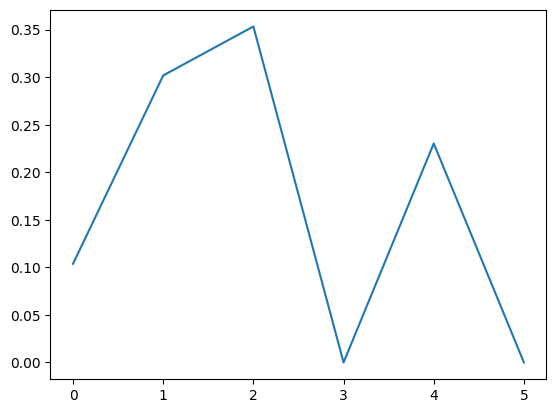

In [23]:
import matplotlib.pyplot as plt
plt.plot(entropy)

In [28]:
q = '대통령이'

def branchEntropy(q):
  result = []
  entropy = []
  oldH = 0.0

  for i in range(len(q)):
    key = q[:i+1]     # 대   =>  ' ' / 어절 전체 중
    given = key[:-1]  # 대한  =>  대 중

    p = getCount(key)/getCount(given)
    entropy.append(-p*log(p))
    # print('{:8s}\t{:8s}\t{:3d}\t{:3d}\t{:.3f}'.format(
    #   given, key, getCount(given), getCount(key), entropy[-1]))

    if oldH > entropy[-1]:
      # print('>>', key)
      result.append(key)

    oldH = entropy[-1]

  return (q, result)

In [29]:
for t in tokens:
  print(branchEntropy(t))

('대한민국헌법', ['대한민국', '대한민국헌법'])
('유구한', ['유구한'])
('역사와', ['역사'])
('전통에', [])
('빛나는', ['빛나'])
('우리', [])
('대한국민은', ['대한국', '대한국민'])
('3·1운동으로', ['3·1'])
('건립된', ['건립된'])
('대한민국임시정부의', ['대한민국', '대한민국임시'])
('법통과', ['법통', '법통과'])
('불의에', [])
('항거한', ['항거한'])
('4·19민주이념을', ['4·1'])
('계승하고,', ['계승하고'])
('조국의', ['조국의'])
('민주개혁과', ['민주개', '민주개혁'])
('평화적', ['평화적'])
('통일의', ['통일의'])
('사명에', [])
('입각하여', ['입각하여'])
('정의·인도와', ['정의', '정의·'])
('동포애로써', ['동포애'])
('민족의', [])
('단결을', [])
('공고히', [])
('하고,', ['하고,'])
('모든', [])
('사회적', [])
('폐습과', ['폐습과'])
('불의를', [])
('타파하며,', ['타파하'])
('자율과', [])
('조화를', ['조화를'])
('바탕으로', ['바탕으'])
('자유민주적', ['자유민', '자유민주'])
('기본질서를', ['기본질서'])
('더욱', ['더욱'])
('확고히', ['확고히'])
('하여', [])
('정치·경제·사회·문화의', ['정치·경'])
('영역에', ['영역에'])
('있어서', [])
('각인의', ['각인의'])
('기회를', [])
('균등히', [])
('능력을', ['능력'])
('최고도로', ['최고도로'])
('발휘하게', ['발휘하'])
('하며,', ['하며,'])
('자유와', [])
('권리에', ['권리에'])
('따르는', ['따르는'])
('책임과', [])
('의무를', ['의무를'])
('완수하게', ['완수'])
('하여,', [])
('안으로는', ['안으로'])

In [4]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab/INISW/NLP/news'

Mounted at /content/drive


In [5]:
from os import listdir

# DataLoader
def fileids(path):
    for f in filter(lambda f:re.search(r'[.]txt$', f), listdir(path)):
        yield path+'/'+f

In [6]:
from string import punctuation

news = []
for f in fileids(path):
    with open(f, 'r', encoding='utf8') as fp:
        news.append(
            re.sub(r'\s+', ' ',
                   re.sub('['+re.escape(punctuation)+']', ' ', fp.read())
                  )
        )
        # [구두점] => ' ', whitespace 1번 이상 => ' '
corpus = '\n'.join(news)

## Perplexity

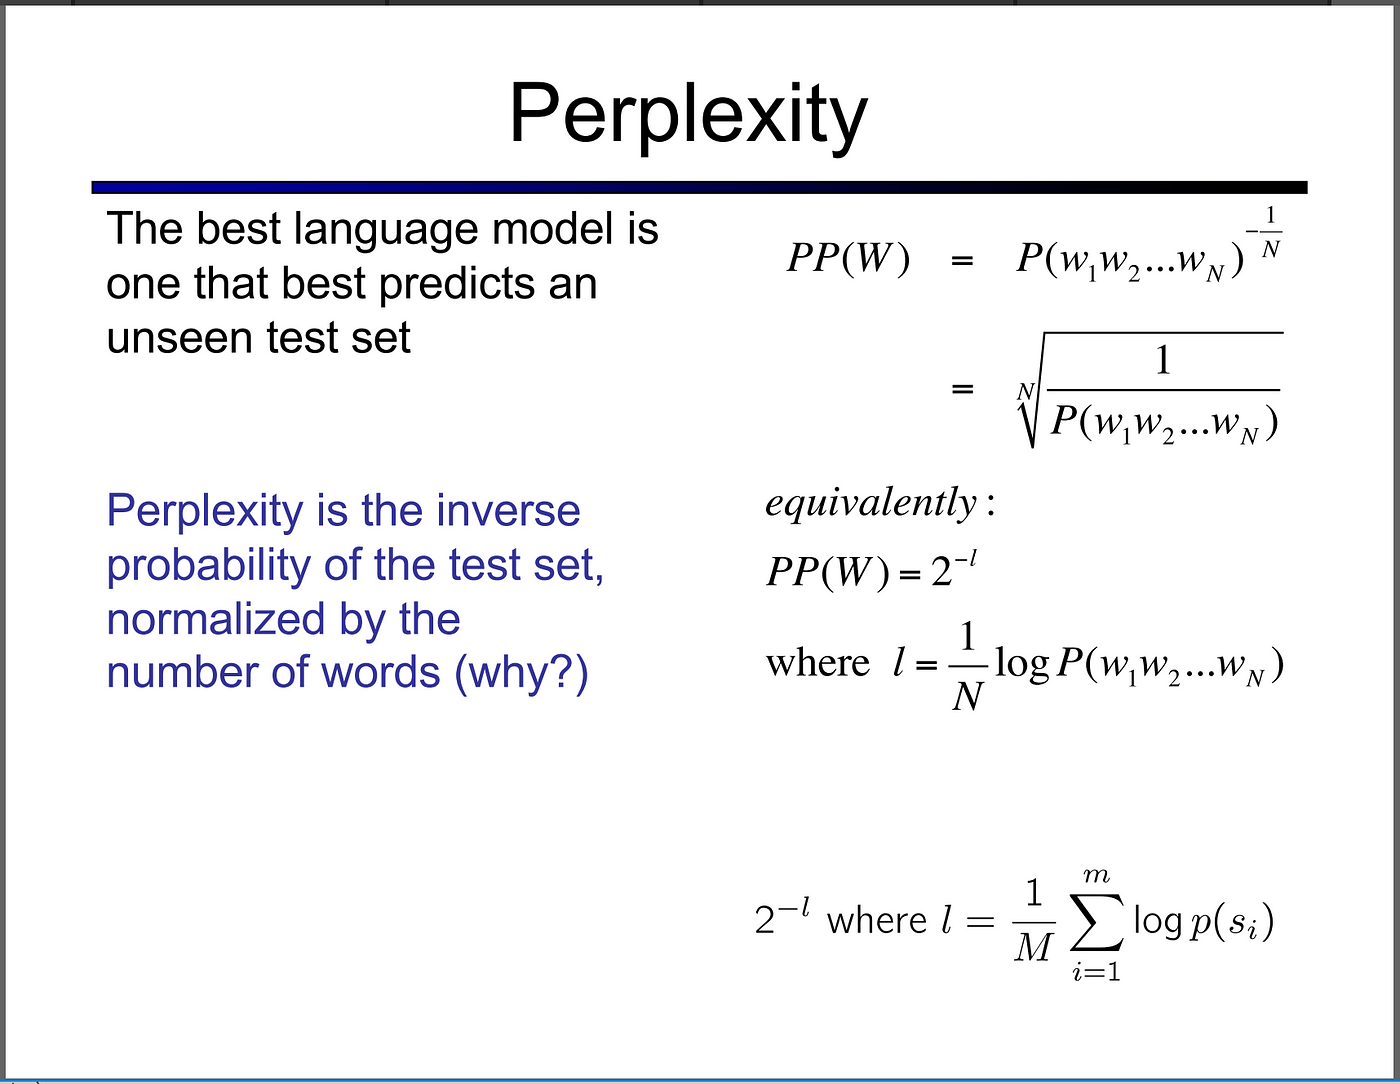

In [ ]:
# PP(P(A,B,C,D)) =  sqrt(1/P(A,B,C,D), len(seq))
#                => Topic1|A,B,C,D...
#                => Topic2|A,B,C,D...
#                => ...
#                => 값이 낮으면 응집력 좋다, 반대면 나쁘다
# PP(P(S1)) => 높으면, 문장으로 자주 활용 X => outlier
# PP(P(S2)) => 낮으면, 문장으로 자주 활용 O => 관심대상

# Cohesion Score
# CS(P(A,B,C,D)) =  sqrt(P(A,B,C,D), len(seq))
#         CS(대통령) > CS(대통령+이)

# CS(P(A,B,C,D)) = P(D|A,B,C)P(C|A,B)P(B|A)
#                = P(A,B,C,D)   P(A,B,C)   P(A,B)
#                  ---------   ---------   ------
#                  P(A,B,C)      P(A,B)      P(A)
#                = P(A,B,C,D) / P(A)
#                = freq(A,B,C,D) / freq(A)

In [37]:
from collections import Counter

tokens = Counter(kolaw.open(kolaw.fileids()[0]).read().split())

for k, v in tokens.items():
  v1 = getCount(k[0])
  cs = list()
  for i in range(1,len(k)):
    v2 = getCount(k[:i+1])
    cs.append(v2/v1)
    # print(k[:i+1], v2/v1)
  # print(min(cs))
  # print(cs.index(min(cs)))
  if len(cs) > 1 and cs.index(min(cs)) > 2:
    print(k, '->', k[:cs.index(min(cs))-1])

대한민국헌법 -> 대한
대한민국임시정부의 -> 대한
기본질서를 -> 기본
국민투표에 -> 국민
대한민국은 -> 대한
대한민국의 -> 대한
기본질서에 -> 기본
안전보장과 -> 안전
②공무원의 -> ②공
헌법재판소에 -> 헌법재
헌법재판소의 -> 헌법재
노력하여야 -> 노력
현행범인인 -> 현행
형사피고인이 -> 형사피
언론·출판의 -> 언론·
집회·결사의 -> 집회·
집회·결사에 -> 집회·
언론·출판이 -> 언론·
공공복리에 -> 공공
국가기관에 -> 국가
영역안에서는 -> 영역안
비상계엄이 -> 비상
군사법원의 -> 군사
형사피고인은 -> 형사피
형사피고인으로서 -> 형사피
직무집행과 -> 직무
근로조건에 -> 근로
근로조건의 -> 근로
단체행동권을 -> 단체행
②공무원인 -> ②공
단체행동권은 -> 단체행
국가안전보장·질서유지 -> 국가안전
공공복리를 -> 공공
국회의원으로 -> 국회
②국회의원의 -> ②국회
③국회의원의 -> ③국회
국회의원의 -> 국회
국회의원은 -> 국회
②국회의원이 -> ②국회
현행범인이 -> 현행
②국회의원은 -> ②국회
③국회의원은 -> ③국회
③대통령이 -> ③대
안전보장을 -> 안전
국회의원과 -> 국회
③대통령은 -> ③대
재적의원과반수의 -> 재적
⑤대통령이 -> ⑤대
회계연도마다 -> 회계
회계연도가 -> 회계
회계연도를 -> 회계
안전보장에 -> 안전
체결·비준에 -> 체결·
선전포고, -> 선전
영역안에서의 -> 영역안
국무총리·국무위원 -> 국무
정부위원은 -> 정부
국정처리상황을 -> 국정처리
출석·답변하여야 -> 출석·답
국무위원이 -> 국무
정부위원으로 -> 정부
출석·답변하게 -> 출석·답
국무위원의 -> 국무
대통령에게 -> 대통
내부규율에 -> 내부
대통령·국무총리·국무위원·행정각부의 -> 대통령·국무
직무집행에 -> 직무
면제되지는 -> 면제
②대통령은 -> ②대
③대통령후보자가 -> ③대
⑤대통령의 -> ⑤대
②대통령이 -> ②대
대통령으로서의 -> 대통령
국무총리, -> 국무
중요정책을 -> 중요


In [39]:
from nltk.tokenize import word_tokenize, regexp_tokenize

# tokens = Counter(kolaw.open(kolaw.fileids()[0]).read().split())
tokens = Counter(regexp_tokenize(kolaw.open(kolaw.fileids()[0]).read(), r'\w+'))

for k, v in tokens.items():
  v1 = getCount(k[0])
  cs = list()
  for i in range(1,len(k)):
    v2 = getCount(k[:i+1])
    cs.append(v2/v1)
    # print(k[:i+1], v2/v1)
  # print(min(cs))
  # print(cs.index(min(cs)))
  if len(cs) > 1 and cs.index(min(cs)) > 2:
    print(k, '->', k[:cs.index(min(cs))-1])

대한민국헌법 -> 대한
대한민국임시정부의 -> 대한
기본질서를 -> 기본
국민투표에 -> 국민
대한민국은 -> 대한
대한민국의 -> 대한
기본질서에 -> 기본
안전보장과 -> 안전
②공무원의 -> ②공
헌법재판소에 -> 헌법재
헌법재판소의 -> 헌법재
노력하여야 -> 노력
현행범인인 -> 현행
형사피고인이 -> 형사피
과학기술자와 -> 과학
공공복리에 -> 공공
국가기관에 -> 국가
영역안에서는 -> 영역안
비상계엄이 -> 비상
군사법원의 -> 군사
형사피고인은 -> 형사피
형사피고인으로서 -> 형사피
공공단체에 -> 공공
직무집행과 -> 직무
근로조건에 -> 근로
근로조건의 -> 근로
단체행동권을 -> 단체행
②공무원인 -> ②공
단체행동권은 -> 단체행
공공복리를 -> 공공
국회의원으로 -> 국회
②국회의원의 -> ②국회
③국회의원의 -> ③국회
국회의원의 -> 국회
국회의원은 -> 국회
②국회의원이 -> ②국회
현행범인이 -> 현행
②국회의원은 -> ②국회
③국회의원은 -> ③국회
③대통령이 -> ③대
안전보장을 -> 안전
국회의원과 -> 국회
③대통령은 -> ③대
재적의원과반수의 -> 재적
⑤대통령이 -> ⑤대
회계연도마다 -> 회계
회계연도가 -> 회계
회계연도를 -> 회계
안전보장에 -> 안전
영역안에서의 -> 영역안
정부위원은 -> 정부
국정처리상황을 -> 국정처리
국무위원이 -> 국무
정부위원으로 -> 정부
국무위원의 -> 국무
대통령에게 -> 대통
내부규율에 -> 내부
행정각부의 -> 행정
직무집행에 -> 직무
면제되지는 -> 면제
②대통령은 -> ②대
③대통령후보자가 -> ③대
⑤대통령의 -> ⑤대
②대통령이 -> ②대
대통령으로서의 -> 대통령
중요정책을 -> 중요
선전포고와 -> 선전
대통령령을 -> 대통
⑤대통령은 -> ⑤대
비상계엄과 -> 비상
국무총리와 -> 국무
국무총리는 -> 국무
행정각부를 -> 행정
국무총리로 -> 국무
국무위원은 -> 국무
국무총리의 -> 국무
국무회의의 -> 국무
국무위원으로 -> 국무
국무회의는 -> 국무

In [ ]:
# L+[R] => 좌+우(접사/어미) e.g)아버지+는, 아버지+를, 께서, 어쩌고, ...
#                            아버지:10, 아버지는:5, 아버지가:5
#                            아:20, 아버지:20, 아버지는:5
#                            CS(아버지)  = freq(아버지)=20/freq(아)=20 => 1
#                            CS(아버지/는) = freq(아버지는)=5/freq(아)=20 => 0.25
#                                L + [R] => (L 어근), R 접사
#                            는지버아, ?는니머어, 는어쩌고 ...
#                            는/? => (L 접사), (R 어근 => 형태소 사전 X, 신조어)

In [ ]:
# |V| => 모델의 복잡도
# 토큰의 수 => 모델의 크기
# Occam's razor =>

In [ ]:
# Branch Entropy => 각 포인트마다 Entorpy
#                   아버지는 => 버|아, 지|아버, 는|아버지
#                             낮음   낮음    높음
# Perplexity, CohesionScore => 첫 글자부터 마지막 글자까지의 응집력
#                              아버|아, 아버지|아, 아버지는|아
#                              높음     높음     낮음
#                              지|는, 지버|는, 지버아|는, ...
#                               낮음  낮음    낮음
#                              께|서, 지|서께, 지버|서께, 지버아|서께, ...
#                               높음   낮음  낮음    낮음
# Ngram, 형태소, 구두점 구분, 정규식(\w+) => 어절(단어)의 형태가 어근에 비해 너무 다양함
# => feature, sub-word(분절) => word=(subword, subword) => V

## BPE
Byte Pair Encoding: Simple form of data compression. The most common pair of consecutive bytes of data is replaced with a byte.

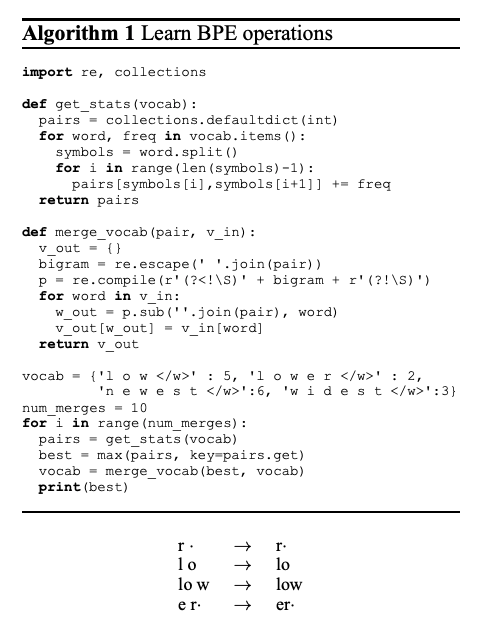
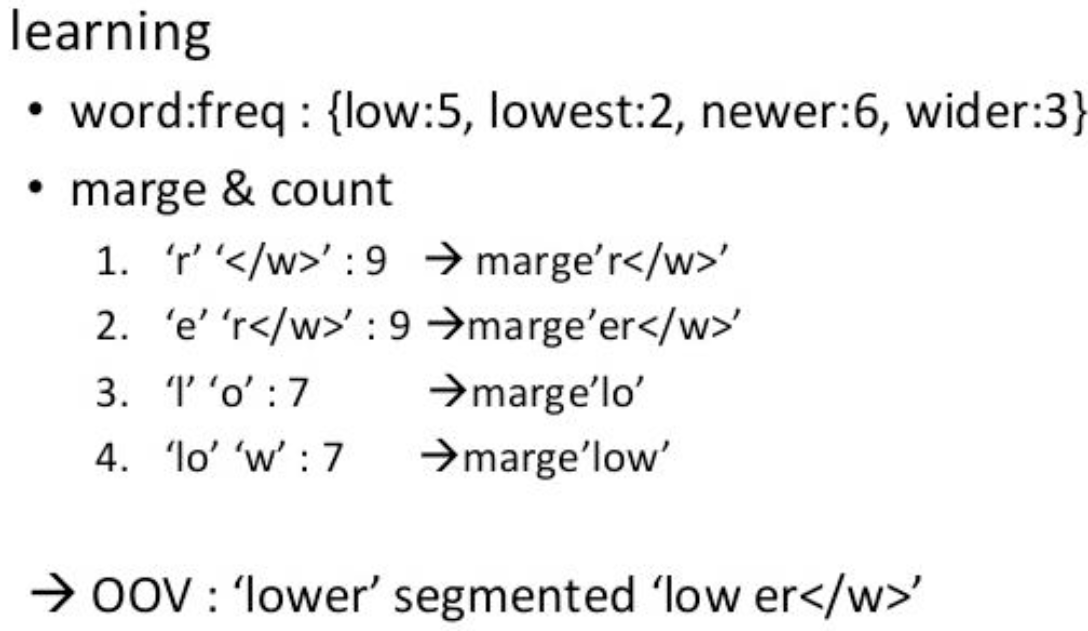

In [ ]:
# 아버지는 => 12bytes
# A는 => 4bytes(압축율 67%)

In [ ]:
#      BPE     =>   WPM(BERT Tokenize)  => (띄어쓰기 없는 경우)SPTokenizer + FastText
# 자주 나오는 표현   Wiki 활률상 자주 나오는 단어

In [ ]:
# 그런집 => 10bits vector => 1vector
# 그+런+집 => 10bits * 3개 => 1vector
# 이+런+집 =>
# 저+런+집

In [9]:
from nltk.text import FreqDist
from nltk.tokenize import word_tokenize, regexp_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
data = 'low low low low low lowest lowest newer newer newer newer newer newer wider wider wider'

FreqDist([' '.join(tuple(token)+('</w>',)) for token in word_tokenize(data)])

FreqDist({'n e w e r </w>': 6, 'l o w </w>': 5, 'w i d e r </w>': 3, 'l o w e s t </w>': 2})

In [14]:
vocab = dict()
for token in word_tokenize(data):
    k = ' '.join(list(token)+['</w>'])
    if k not in vocab:
        vocab[k] = 0
    vocab[k] += 1

vocab

{'l o w </w>': 5,
 'l o w e s t </w>': 2,
 'n e w e r </w>': 6,
 'w i d e r </w>': 3}

In [15]:
from collections import defaultdict

vocab = defaultdict(int)
for token in word_tokenize(data):
    k = ' '.join(list(token)+['</w>'])
    vocab[k] += 1 # if not in, vocab[k] = 0, vocab[k] = vocab[k] + 1

vocab

defaultdict(int,
            {'l o w </w>': 5,
             'l o w e s t </w>': 2,
             'n e w e r </w>': 6,
             'w i d e r </w>': 3})

In [16]:
def get_stats(words):
    # {k:v}, k <= bigram
    result = dict()
    for k,v in words.items(): # k=>'l o w' : v=>6
        k = k.split()
        for i in range(len(k)-1): # 'l','o','w'
            newKey = ' '.join(k[i:i+2])
            if newKey not in result:
                result[newKey] = 0
            result[newKey] += v
    return result

In [17]:
pairs = get_stats(vocab)

In [18]:
best = max(pairs, key=pairs.get)

In [19]:
def merge_vocab(best, pairs):
    p = best.split()
    result = dict()
    for k,v in pairs.items():
        newKey = re.sub(p[0]+'\s'+p[1], p[0]+p[1], k)
        result[newKey] = v
    return result

In [20]:
tokens = merge_vocab(best, vocab)

In [21]:
[tuple(t.split()) for t in tokens.keys()]

[('l', 'o', 'w', '</w>'),
 ('l', 'o', 'w', 'e', 's', 't', '</w>'),
 ('n', 'e', 'w', 'er', '</w>'),
 ('w', 'i', 'd', 'er', '</w>')]

In [22]:
for i in range(5):
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)
[tuple(t.split()) for t in vocab.keys()]

[('low', '</w>'),
 ('low', 'e', 's', 't', '</w>'),
 ('ne', 'w', 'er</w>'),
 ('w', 'i', 'd', 'er</w>')]

In [24]:
len(set(data))

11

In [25]:
t = []
for row in vocab.keys():
    t.extend(row.split())
len(set(t))

10